Body size and range size relationship of avian scavengers
=================

Proposal
-----------

* Explain the triangle-shaped distribution
* More clearly state hypotheses and rationale

### Background

* Original hypothesis was that we would see a positive relationship, but this was before we expanded to global birds. But note that there's an effective size limit on how big birds can get
1. We expect to see a slightly negative relationship when looking at scavengers as a whole due to the number of obligate scavengers dominating the large body size classes that have small EOOs; the extremeness of the large size paired with the small EOO of those obligates may be enough to affect the linear relationship across all species, contrary to the expected relationship between bigger body sizes and larger EOOs [cite: Brown and Maurer 1989]. 
2. We anticipate that separating the obligate and facultative scavengers into their own groups will reveal different BSRS relationships. The range size of obligate scavengers will be limited by body size, because they are so large they must remain in geographic areas that facilitate flight, such as the Andean condor living in exclusively mountainous regions with strong updrafts [CITATION]. Therefore, we expect to see a negative relationship between BS and RS. However, facultative scavengers may show a positive body size-range size relationship that more closely matches the expectations outlined by Brown and Maurer 1989, because we are considering so many more species with a greater variability in body sizes; refer to that paper that showed mammals with bigger body sizes are kinda ecologically required to have larger ranges.

<!-- The range size of obligate scavengers will be limited by body size, because we have so many large sp within this group and will drag the line down -->

### Objectives

### Significance

* Highlights the importance of scale in macroecological research. What we already recognize in macroecology of that "rule" in macroecology of larger body sizes means larger range sizes and that diff patterns can be viewed at different scales, and the further we break down relationships between taxa the more the "rule" of BSRS disintegrates.
* Looks at that rule of BSRS [cite Brown and Maurer 1989] and looks at how that rule breaks down as we change the taxonomic scale under consideration.

### Methods

We will study 65 species of 22 obligate and 43 facultative avian scavengers from around the world. eBird is a bird-watching database with a wealth of observation records that we will use to calculate the extent of occurrence (EOO) of each species.

We draw from the methods used by [Blackburn and Gaston (1986)](https://www.jstor.org/stable/56368) to evaluate the relationship between the body size and the range size of obligate and facultative avian scavenger species. First we examine them as a single entity and then compare the effect diet strategy may have on the body size-range size relationship.

-------------------------------
Preamble
--------

Import libraries, open the data, set global options.

In [58]:
import pandas as pd  # For manipulating data structures
import numpy as np  # For mathematical functions
import statsmodels.api as sm  # For statistical methods
import matplotlib.pyplot as plt  # Essentially the Python equivalent to ggplot2
import seaborn as sns  # A library for statistical graphics built on top of Matplotlib


# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(
    context="notebook",
    # style="white",
    palette="colorblind",
    # rc=custom_params
)

Read the data, excluding the columns Cara and I used for bookkeeping. I will index by species names rather than by row numbers to make working with the data frame more intuitive.

In [2]:
columns = [
    "Species name",
    "Scientific name",
    "Diet",
    "Extent of occurrence",
    "BirdLife Extent of occurrence",
    "Body size",
]

scavengers = pd.read_csv(
    "../data/MacroEco scavenger data.csv", usecols=columns, index_col="Species name"
)
scavengers.head()

,Scientific name,Diet,Extent of occurrence,BirdLife Extent of occurrence,Body size
Species name,,,,,
Black vulture,Coragyps atratus,Obligate,42593865.0,44300000.0,2200
Turkey vulture,Cathartes aura,Obligate,52285085.0,47100000.0,2500
Lesser yellow headed vulture,Cathartes burrovianus,Obligate,19989926.0,19600000.0,950
Greater yellow headed vulture,Cathartes melambrotus,Obligate,7481821.0,7330000.0,1650
King vulture,Sarcoramphus papa,Obligate,17390218.0,22600000.0,3800


Find and display any rows that have `NaN` (Not a Number) values.

In [3]:
scavengers.loc[scavengers.isnull().any(axis=1)]

,Scientific name,Diet,Extent of occurrence,BirdLife Extent of occurrence,Body size
Species name,,,,,
Hooded crow,Corvus cornix,Facultative,21136393.72,NaN,650


BirdLife currently lists no data for the extent of occurrence (EOO) for the hooded crow, so let's drop it from our dataset.

In [4]:
scavengers.drop(["Hooded crow"], inplace=True)

Let's make separate DataFrames for obligate and scavenger species.

In [27]:
obligates = scavengers.loc[scavengers["Diet"] == "Obligate"]
facultatives = scavengers.loc[scavengers["Diet"] == "Facultative"]

Raw data exploration
-----------

Compare the raw data of the EOO from BirdLife and the EOO that Cara and I calculated in ArcGIS with the convex hull method.

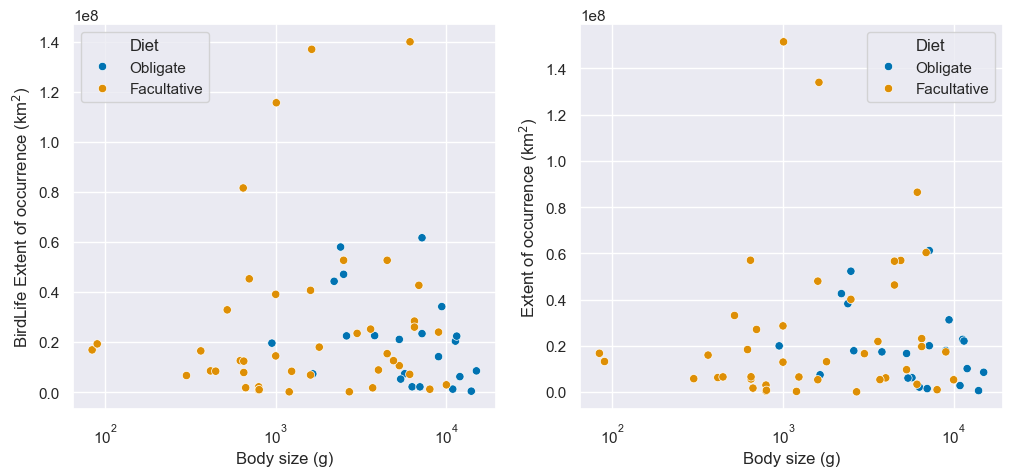

In [59]:
fig, (ax1, ax2) = plt.subplots(
    1,  # The number of rows in my plot.
    2,  # The number of columns in my plot.
    figsize=(12, 5),
    sharex=True,
)

sns.scatterplot(
    ax=ax1,
    x="Body size",
    y="BirdLife Extent of occurrence",
    hue="Diet",
    data=scavengers,
)
sns.scatterplot(
    ax=ax2,
    x="Body size",
    y="Extent of occurrence",
    hue="Diet",
    data=scavengers,
)
ax1.set_xlabel("Body size (g)")
ax2.set_xlabel("Body size (g)")
ax1.set_ylabel("BirdLife Extent of occurrence (km$^2$)")
ax2.set_ylabel("Extent of occurrence (km$^2$)")
plt.xscale("log")  # Default log scale used by Seaborn is base 10, not natural log.
plt.show()

They don't look too terribly different so that's a good sign for how we calculated the EOO in ArcGIS, considering how BirdLife has access to more sources of data. With that newly instilled confidence, let's look at how the data is distributed.

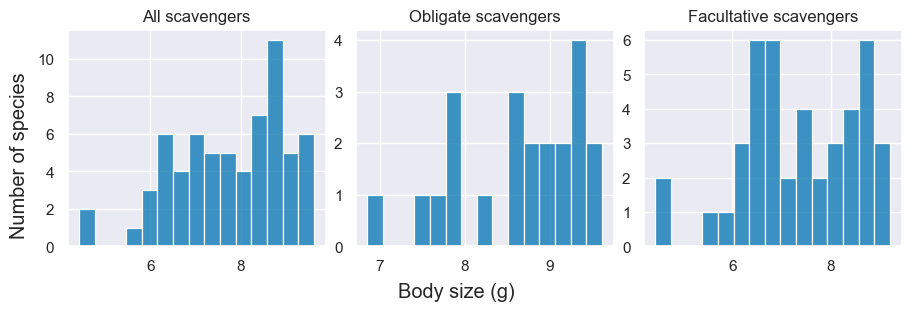

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), layout="constrained")

# Data and titles for each subplot
data = [scavengers, obligates, facultatives]
titles = ["All scavengers", "Obligate scavengers", "Facultative scavengers"]

# Plot histograms
for ax, d, title in zip(axes, data, titles):
    sns.histplot(ax=ax, data=d, x=np.log(d["Body size"]), bins=15)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title)

# Set common labels
fig.supxlabel("Body size (g)")
fig.supylabel("Number of species")

plt.show()

In [29]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 4), layout="constrained")
# sns.histplot(
#     data=scavengers,
#     x=np.log(scavengers["Extent of occurrence"]),
#     bins=15,
# )
# plt.show()

The above histograms look similar to the 

-----------
## OLS - scavengers without dietary distinction

**Define the fixed and dependent variables.**

Blackburn and Gaston 1996 used ordinary least squares with a log transformation applied to the body sizes, which we have done here as well.

The `OLS` function in the Statsmodels library does not include the intercept term, $\beta_0$, by default, so we must do this ourselves. The way to do this is with the `add_constant` function to add a constant term to the linear equation, adding a column called "const". ([Statsmodels tools.add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html)). In effect, it is the difference between fitting $y = \beta_1x$ and $y = \beta_0 + \beta_1x$.

[.pyTutorial, 2025. Python Statsmodels add_constant() explained](https://pytutorial.com/python-statsmodels-add_constant-explained/).

<!-- The intercept term is the expected value of the dependent variable when the fixed variables are zero. -->
<!-- The way to do this is with the `add_constant` function to add a constant term, which is the intercept of the regression line. What `add_constant` does is it adds a column of ones to the dataset. -->

In [8]:
y = scavengers["Extent of occurrence"]
x = np.log(scavengers["Body size"])  # N.B. Numpy uses the natural log by default.
x = sm.add_constant(x)

# If I want to compare with the fit using BirdLife's EOO:
# y_birdlife = scavengers["BirdLife Extent of occurrence"]

**Fit the OLS model using our EOO data.** 
<!-- A second model is available to view BirdLife EOO data's model fit. -->

`fit` uses the Moore-Penrose pseudoinverse method ([Statsmodels OLS.fit](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html)), a commonly used method to solve the least squares system of linear equations ([Wolfram Mathworld, Moore-Penrose Matrix Inverse](https://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html)).

In [9]:
ols_model = sm.OLS(y, x).fit()
# birdlife_ols_model = sm.OLS(y_birdlife, x).fit()  # For the BirdLife EOO data model.

print(ols_model.summary())

                             OLS Regression Results                             
Dep. Variable:     Extent of occurrence   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.016
Method:                   Least Squares   F-statistic:                  0.004643
Date:                  Mon, 07 Apr 2025   Prob (F-statistic):              0.946
Time:                          10:44:18   Log-Likelihood:                -1208.0
No. Observations:                    65   AIC:                             2420.
Df Residuals:                        63   BIC:                             2424.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.185e+07   2.33e+07

The `coef` column shows the OLS regression coefficients, from which we can determine our regression equation:

$y_i = \beta_0 + \beta_1x_i$

EOO $_i$ = 2.16 x $10^7$ + 2.28 x $10^5 \cdot$(Body size $_i$)

This is practically a flat line, shown below, indicating that there's basically no effect of body size on EOO across avian scavenger species and is corroborated by the $R^2$ value of 0.0. The p-value, 0.94, also suggests no relationship between body size and range size in avian scavengers.

The Jarque-Bera test result indicates that the data is not normally distributed (233.3, p < 0.05), so this might warrant further investigation whether an OLS is an appropriate test to use.

Text(0, 0.5, 'EOO (km$^2$)')

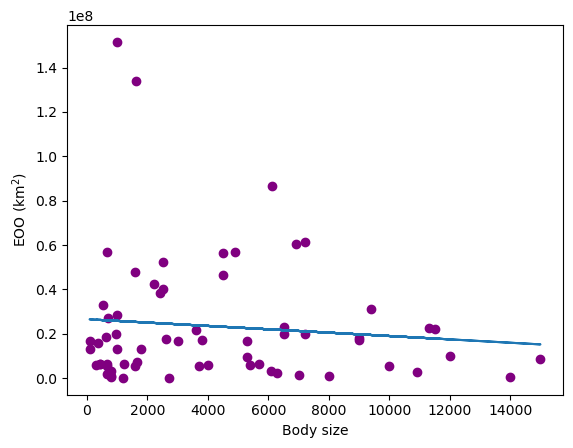

In [10]:
a, b = np.polyfit(scavengers["Body size"], scavengers["Extent of occurrence"], 1)  # Fit a polynomial with least squares polynomial fit

plt.scatter(y=scavengers["Extent of occurrence"], x=scavengers["Body size"], color="purple")
plt.plot(scavengers["Body size"], a * scavengers["Body size"] + b)

plt.xlabel("Body size")
plt.ylabel("EOO (km$^2$)")
# plt.text(1, 90, "y = " + "{:.3f}".format(b) + " + {:.3f}".format(a) + "x", size=12)
# plt.xscale("log")

-------------
References
---------

BirdLife International (2025) IUCN Red List for birds. Last visited 2025-03-14. https://datazone.birdlife.org/